# Lab session 11: K Nearest Neighbours (KNN)
__Name: Makesh Srinivasan<br>
Registration number: 19BCE1717<br>
Course code: CSE4020<br>
Faculty: Dr. Abdul Quadir<br>
Slot: L31 + L32<br>
Date: 08-November-2021 Monday__<br><br>
    
Instructions:<br>
Generate a dataset with 30 rows, 2 features and two classes for a label. Perform KNN classifer and Weighted KNN classifier

### Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from numpy.random import seed
from numpy.random import randint

### Generate a dataset

In [2]:
seed(1)
feature_1 = randint(0, 20, 30)
feature_2 = randint(0, 20, 30)
label = randint(1, 3, 30)
dataset = pd.DataFrame({'feature_1':feature_1, 'feature_2':feature_2, 'label':label})
dataset

feature_1  feature_2  label
0           5          1      1
1          11          0      2
2          12         17      2
3           8          8      2
4           9         13      1
5          11         19      2
6           5         15      2
7          15         10      1
8           0          8      2
9          16          7      2
10          1          3      2
11         12          6      2
12          7         17      1
13         13          3      1
14          6          4      1
15         18         17      1
16          5         11      1
17         18         12      2
18         11         16      2
19         10         13      2
20         14         19      2
21         18          9      2
22          4         18      2
23          9         15      2
24         17          0      1
25          0          4      1
26         13         15      1
27          9          2      1
28          9          7      1
29          7          8      1

In [3]:
c1 = dataset[dataset.iloc[:,-1] == 1]
c2 = dataset[dataset.iloc[:,-1] == 2]

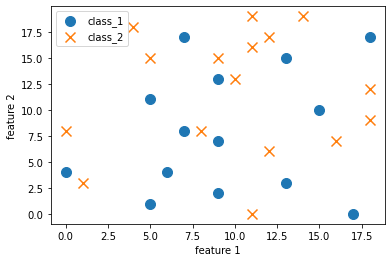

In [4]:
plt.scatter(np.array(c1.iloc[:,0]), np.array(c1.iloc[:,1]), marker='o', label='class_1', s=100)
plt.scatter(np.array(c2.iloc[:,0]), np.array(c2.iloc[:,1]), marker='x', label='class_2', s=100)
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.legend()
plt.show()

NOTE: the dataset may vary with each run. Use of seed() can prevent it but it is localised to the host computer 

<hr>

### Helper functions

*Euclidean distance function*

In [5]:
def distance(c1, c2):
    return np.sqrt((c1[0]-c2[0])**2 + (c1[1]-c2[1])**2)

_Visualisation function_

In [6]:
def KNN_visualise(test_data, k_nearest_neighbours, dataset):
    c1 = dataset[dataset.iloc[:,-1] == 1]
    c2 = dataset[dataset.iloc[:,-1] == 2]
    plt.scatter(np.array(c1.iloc[:,0]), np.array(c1.iloc[:,1]), marker='o', label='class_1', alpha=0.3, s=100)
    plt.scatter(np.array(c2.iloc[:,0]), np.array(c2.iloc[:,1]), marker='x', label='class_2', alpha=0.3, s=100)
    x = []
    y = []
    for i in range(len(k_nearest_neighbours)):
        x.append(k_nearest_neighbours[i][0][0])
        y.append(k_nearest_neighbours[i][0][1])
        plt.plot([test_data[0], k_nearest_neighbours[i][0][0]], [test_data[1], k_nearest_neighbours[i][0][1]], c="blue")
    plt.scatter(np.array(x), np.array(y), marker='*', label='closest neighbours', c="red")
    plt.scatter(np.array(test_data[0]), np.array(test_data[1]), marker='+', label='test data', c="green", s=204)
        
    plt.xlabel('feature 1')
    plt.ylabel('feature 2')
    plt.legend()
    plt.show()

_Function to get the nearest neighbours_

In [7]:
def nearest_neighbours(test_data, train_data):
    # Euclidean distance between the test tuple and each entry in the data
    closest_neighbours = list()
    for i in range(len(train_data)):
        closest_neighbours.append((train_data[i], distance(test_data, train_data[i])))
    
    # return the neighbours list sorted in ascending order of distance
    closest_neighbours.sort(key=lambda li: li[1])
    
    return closest_neighbours  #[[f1,f2,label], distance]

_Dataframe to list function_

In [8]:
def load_train_data(df):
    return df.values.tolist()

<hr>

### Classifiers to perform:
Perform KNN and Weighted KNN classification for the following K values for the test data = [6,12]<br>
k = [2,3,5,7,9,11,13,17,19,23,24,25,29]<br>
1) <a href="#KNN">KNN classifier</a><br>
2) <a href="#Weighted_KNN">Weighted KNN classifier</a><br>

In [9]:
k_values = [2,3,5,7,9,11,13,17,19,23,24,25,29]
test_data = [6,12]

<hr>

#### <div id="KNN">1) K Nearest Neighbours classifier (KNN)</div>

In [10]:
def KNN_prediction(test_data, dataset, k):
    train_data = load_train_data(dataset)
    
    # Get the nearest neighbours
    k_nearest_neighbours = nearest_neighbours(test_data, train_data)[0:k]
    
    # Visualise using the plot (KNN):
    KNN_visualise(test_data, k_nearest_neighbours, dataset)
    
    # Print the neighbours
    print(f"The {k} nearest neighbours are: \n")
    label_class = []
    for i in range(len(k_nearest_neighbours)):
        print(f"Neighbour = {k_nearest_neighbours[i][0]}  \t  Euclidean distance = {k_nearest_neighbours[i][1]}")
        label_class.append(k_nearest_neighbours[i][0][-1])
    
    # Show the predicted class based on max() occurance in the nearest neighbours
    predicted_class = max(set(label_class), key=label_class.count)
    print(f"\nThe {k} nearest neighbours' classes are: ")
    print(label_class)
    print(f"\nPrediction class = {predicted_class}")
    return predicted_class

__KNN Classification__

K = 2:



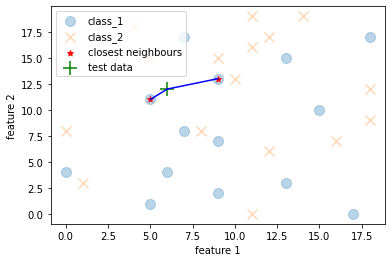

The 2 nearest neighbours are: 

Neighbour = [5, 11, 1]  	  Euclidean distance = 1.4142135623730951
Neighbour = [9, 13, 1]  	  Euclidean distance = 3.1622776601683795

The 2 nearest neighbours' classes are: 
[1, 1]

Prediction class = 1
The class predicted for the data [6, 12] is 1 (Blue circle)
____________________________________________________________________________________________________
K = 3:



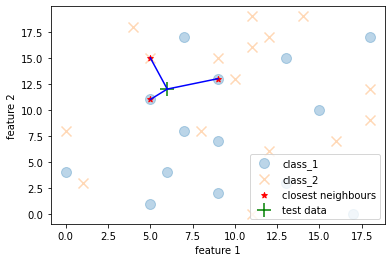

The 3 nearest neighbours are: 

Neighbour = [5, 11, 1]  	  Euclidean distance = 1.4142135623730951
Neighbour = [9, 13, 1]  	  Euclidean distance = 3.1622776601683795
Neighbour = [5, 15, 2]  	  Euclidean distance = 3.1622776601683795

The 3 nearest neighbours' classes are: 
[1, 1, 2]

Prediction class = 1
The class predicted for the data [6, 12] is 1 (Blue circle)
____________________________________________________________________________________________________
K = 5:



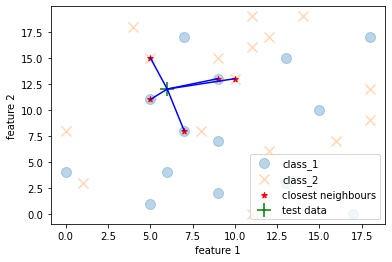

The 5 nearest neighbours are: 

Neighbour = [5, 11, 1]  	  Euclidean distance = 1.4142135623730951
Neighbour = [9, 13, 1]  	  Euclidean distance = 3.1622776601683795
Neighbour = [5, 15, 2]  	  Euclidean distance = 3.1622776601683795
Neighbour = [10, 13, 2]  	  Euclidean distance = 4.123105625617661
Neighbour = [7, 8, 1]  	  Euclidean distance = 4.123105625617661

The 5 nearest neighbours' classes are: 
[1, 1, 2, 2, 1]

Prediction class = 1
The class predicted for the data [6, 12] is 1 (Blue circle)
____________________________________________________________________________________________________
K = 7:



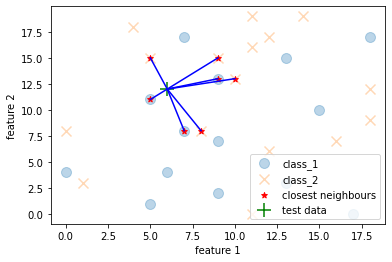

The 7 nearest neighbours are: 

Neighbour = [5, 11, 1]  	  Euclidean distance = 1.4142135623730951
Neighbour = [9, 13, 1]  	  Euclidean distance = 3.1622776601683795
Neighbour = [5, 15, 2]  	  Euclidean distance = 3.1622776601683795
Neighbour = [10, 13, 2]  	  Euclidean distance = 4.123105625617661
Neighbour = [7, 8, 1]  	  Euclidean distance = 4.123105625617661
Neighbour = [9, 15, 2]  	  Euclidean distance = 4.242640687119285
Neighbour = [8, 8, 2]  	  Euclidean distance = 4.47213595499958

The 7 nearest neighbours' classes are: 
[1, 1, 2, 2, 1, 2, 2]

Prediction class = 2
The class predicted for the data [6, 12] is 2 (Orange cross)
____________________________________________________________________________________________________
K = 9:



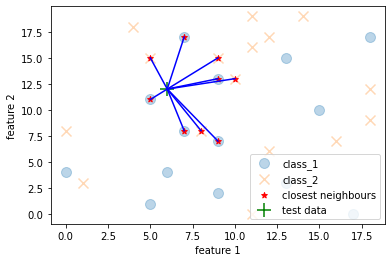

The 9 nearest neighbours are: 

Neighbour = [5, 11, 1]  	  Euclidean distance = 1.4142135623730951
Neighbour = [9, 13, 1]  	  Euclidean distance = 3.1622776601683795
Neighbour = [5, 15, 2]  	  Euclidean distance = 3.1622776601683795
Neighbour = [10, 13, 2]  	  Euclidean distance = 4.123105625617661
Neighbour = [7, 8, 1]  	  Euclidean distance = 4.123105625617661
Neighbour = [9, 15, 2]  	  Euclidean distance = 4.242640687119285
Neighbour = [8, 8, 2]  	  Euclidean distance = 4.47213595499958
Neighbour = [7, 17, 1]  	  Euclidean distance = 5.0990195135927845
Neighbour = [9, 7, 1]  	  Euclidean distance = 5.830951894845301

The 9 nearest neighbours' classes are: 
[1, 1, 2, 2, 1, 2, 2, 1, 1]

Prediction class = 1
The class predicted for the data [6, 12] is 1 (Blue circle)
____________________________________________________________________________________________________
K = 11:



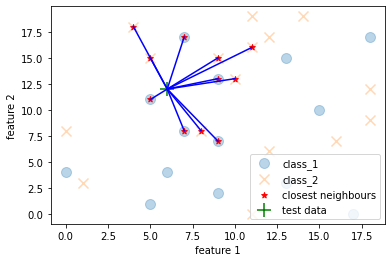

The 11 nearest neighbours are: 

Neighbour = [5, 11, 1]  	  Euclidean distance = 1.4142135623730951
Neighbour = [9, 13, 1]  	  Euclidean distance = 3.1622776601683795
Neighbour = [5, 15, 2]  	  Euclidean distance = 3.1622776601683795
Neighbour = [10, 13, 2]  	  Euclidean distance = 4.123105625617661
Neighbour = [7, 8, 1]  	  Euclidean distance = 4.123105625617661
Neighbour = [9, 15, 2]  	  Euclidean distance = 4.242640687119285
Neighbour = [8, 8, 2]  	  Euclidean distance = 4.47213595499958
Neighbour = [7, 17, 1]  	  Euclidean distance = 5.0990195135927845
Neighbour = [9, 7, 1]  	  Euclidean distance = 5.830951894845301
Neighbour = [4, 18, 2]  	  Euclidean distance = 6.324555320336759
Neighbour = [11, 16, 2]  	  Euclidean distance = 6.4031242374328485

The 11 nearest neighbours' classes are: 
[1, 1, 2, 2, 1, 2, 2, 1, 1, 2, 2]

Prediction class = 2
The class predicted for the data [6, 12] is 2 (Orange cross)
_______________________________________________________________________________

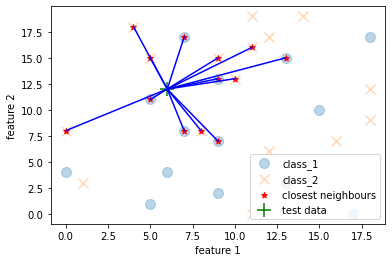

The 13 nearest neighbours are: 

Neighbour = [5, 11, 1]  	  Euclidean distance = 1.4142135623730951
Neighbour = [9, 13, 1]  	  Euclidean distance = 3.1622776601683795
Neighbour = [5, 15, 2]  	  Euclidean distance = 3.1622776601683795
Neighbour = [10, 13, 2]  	  Euclidean distance = 4.123105625617661
Neighbour = [7, 8, 1]  	  Euclidean distance = 4.123105625617661
Neighbour = [9, 15, 2]  	  Euclidean distance = 4.242640687119285
Neighbour = [8, 8, 2]  	  Euclidean distance = 4.47213595499958
Neighbour = [7, 17, 1]  	  Euclidean distance = 5.0990195135927845
Neighbour = [9, 7, 1]  	  Euclidean distance = 5.830951894845301
Neighbour = [4, 18, 2]  	  Euclidean distance = 6.324555320336759
Neighbour = [11, 16, 2]  	  Euclidean distance = 6.4031242374328485
Neighbour = [0, 8, 2]  	  Euclidean distance = 7.211102550927978
Neighbour = [13, 15, 1]  	  Euclidean distance = 7.615773105863909

The 13 nearest neighbours' classes are: 
[1, 1, 2, 2, 1, 2, 2, 1, 1, 2, 2, 2, 1]

Prediction class = 2
Th

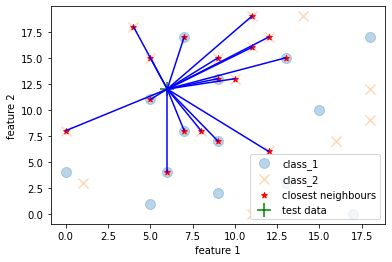

The 17 nearest neighbours are: 

Neighbour = [5, 11, 1]  	  Euclidean distance = 1.4142135623730951
Neighbour = [9, 13, 1]  	  Euclidean distance = 3.1622776601683795
Neighbour = [5, 15, 2]  	  Euclidean distance = 3.1622776601683795
Neighbour = [10, 13, 2]  	  Euclidean distance = 4.123105625617661
Neighbour = [7, 8, 1]  	  Euclidean distance = 4.123105625617661
Neighbour = [9, 15, 2]  	  Euclidean distance = 4.242640687119285
Neighbour = [8, 8, 2]  	  Euclidean distance = 4.47213595499958
Neighbour = [7, 17, 1]  	  Euclidean distance = 5.0990195135927845
Neighbour = [9, 7, 1]  	  Euclidean distance = 5.830951894845301
Neighbour = [4, 18, 2]  	  Euclidean distance = 6.324555320336759
Neighbour = [11, 16, 2]  	  Euclidean distance = 6.4031242374328485
Neighbour = [0, 8, 2]  	  Euclidean distance = 7.211102550927978
Neighbour = [13, 15, 1]  	  Euclidean distance = 7.615773105863909
Neighbour = [12, 17, 2]  	  Euclidean distance = 7.810249675906654
Neighbour = [6, 4, 1]  	  Euclidean dis

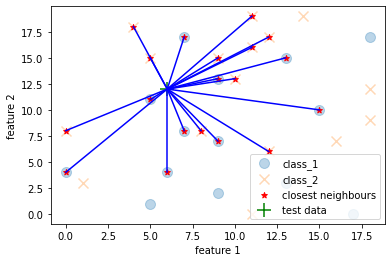

The 19 nearest neighbours are: 

Neighbour = [5, 11, 1]  	  Euclidean distance = 1.4142135623730951
Neighbour = [9, 13, 1]  	  Euclidean distance = 3.1622776601683795
Neighbour = [5, 15, 2]  	  Euclidean distance = 3.1622776601683795
Neighbour = [10, 13, 2]  	  Euclidean distance = 4.123105625617661
Neighbour = [7, 8, 1]  	  Euclidean distance = 4.123105625617661
Neighbour = [9, 15, 2]  	  Euclidean distance = 4.242640687119285
Neighbour = [8, 8, 2]  	  Euclidean distance = 4.47213595499958
Neighbour = [7, 17, 1]  	  Euclidean distance = 5.0990195135927845
Neighbour = [9, 7, 1]  	  Euclidean distance = 5.830951894845301
Neighbour = [4, 18, 2]  	  Euclidean distance = 6.324555320336759
Neighbour = [11, 16, 2]  	  Euclidean distance = 6.4031242374328485
Neighbour = [0, 8, 2]  	  Euclidean distance = 7.211102550927978
Neighbour = [13, 15, 1]  	  Euclidean distance = 7.615773105863909
Neighbour = [12, 17, 2]  	  Euclidean distance = 7.810249675906654
Neighbour = [6, 4, 1]  	  Euclidean dis

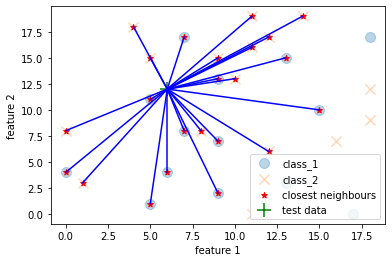

The 23 nearest neighbours are: 

Neighbour = [5, 11, 1]  	  Euclidean distance = 1.4142135623730951
Neighbour = [9, 13, 1]  	  Euclidean distance = 3.1622776601683795
Neighbour = [5, 15, 2]  	  Euclidean distance = 3.1622776601683795
Neighbour = [10, 13, 2]  	  Euclidean distance = 4.123105625617661
Neighbour = [7, 8, 1]  	  Euclidean distance = 4.123105625617661
Neighbour = [9, 15, 2]  	  Euclidean distance = 4.242640687119285
Neighbour = [8, 8, 2]  	  Euclidean distance = 4.47213595499958
Neighbour = [7, 17, 1]  	  Euclidean distance = 5.0990195135927845
Neighbour = [9, 7, 1]  	  Euclidean distance = 5.830951894845301
Neighbour = [4, 18, 2]  	  Euclidean distance = 6.324555320336759
Neighbour = [11, 16, 2]  	  Euclidean distance = 6.4031242374328485
Neighbour = [0, 8, 2]  	  Euclidean distance = 7.211102550927978
Neighbour = [13, 15, 1]  	  Euclidean distance = 7.615773105863909
Neighbour = [12, 17, 2]  	  Euclidean distance = 7.810249675906654
Neighbour = [6, 4, 1]  	  Euclidean dis

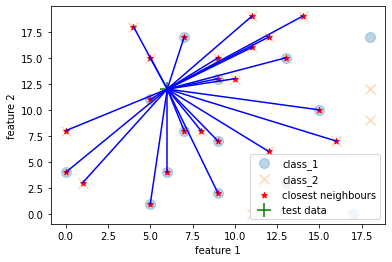

The 24 nearest neighbours are: 

Neighbour = [5, 11, 1]  	  Euclidean distance = 1.4142135623730951
Neighbour = [9, 13, 1]  	  Euclidean distance = 3.1622776601683795
Neighbour = [5, 15, 2]  	  Euclidean distance = 3.1622776601683795
Neighbour = [10, 13, 2]  	  Euclidean distance = 4.123105625617661
Neighbour = [7, 8, 1]  	  Euclidean distance = 4.123105625617661
Neighbour = [9, 15, 2]  	  Euclidean distance = 4.242640687119285
Neighbour = [8, 8, 2]  	  Euclidean distance = 4.47213595499958
Neighbour = [7, 17, 1]  	  Euclidean distance = 5.0990195135927845
Neighbour = [9, 7, 1]  	  Euclidean distance = 5.830951894845301
Neighbour = [4, 18, 2]  	  Euclidean distance = 6.324555320336759
Neighbour = [11, 16, 2]  	  Euclidean distance = 6.4031242374328485
Neighbour = [0, 8, 2]  	  Euclidean distance = 7.211102550927978
Neighbour = [13, 15, 1]  	  Euclidean distance = 7.615773105863909
Neighbour = [12, 17, 2]  	  Euclidean distance = 7.810249675906654
Neighbour = [6, 4, 1]  	  Euclidean dis

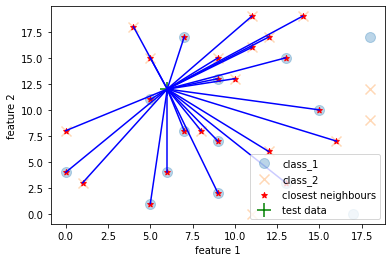

The 25 nearest neighbours are: 

Neighbour = [5, 11, 1]  	  Euclidean distance = 1.4142135623730951
Neighbour = [9, 13, 1]  	  Euclidean distance = 3.1622776601683795
Neighbour = [5, 15, 2]  	  Euclidean distance = 3.1622776601683795
Neighbour = [10, 13, 2]  	  Euclidean distance = 4.123105625617661
Neighbour = [7, 8, 1]  	  Euclidean distance = 4.123105625617661
Neighbour = [9, 15, 2]  	  Euclidean distance = 4.242640687119285
Neighbour = [8, 8, 2]  	  Euclidean distance = 4.47213595499958
Neighbour = [7, 17, 1]  	  Euclidean distance = 5.0990195135927845
Neighbour = [9, 7, 1]  	  Euclidean distance = 5.830951894845301
Neighbour = [4, 18, 2]  	  Euclidean distance = 6.324555320336759
Neighbour = [11, 16, 2]  	  Euclidean distance = 6.4031242374328485
Neighbour = [0, 8, 2]  	  Euclidean distance = 7.211102550927978
Neighbour = [13, 15, 1]  	  Euclidean distance = 7.615773105863909
Neighbour = [12, 17, 2]  	  Euclidean distance = 7.810249675906654
Neighbour = [6, 4, 1]  	  Euclidean dis

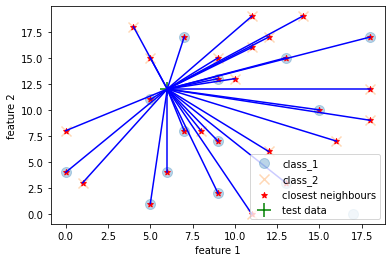

The 29 nearest neighbours are: 

Neighbour = [5, 11, 1]  	  Euclidean distance = 1.4142135623730951
Neighbour = [9, 13, 1]  	  Euclidean distance = 3.1622776601683795
Neighbour = [5, 15, 2]  	  Euclidean distance = 3.1622776601683795
Neighbour = [10, 13, 2]  	  Euclidean distance = 4.123105625617661
Neighbour = [7, 8, 1]  	  Euclidean distance = 4.123105625617661
Neighbour = [9, 15, 2]  	  Euclidean distance = 4.242640687119285
Neighbour = [8, 8, 2]  	  Euclidean distance = 4.47213595499958
Neighbour = [7, 17, 1]  	  Euclidean distance = 5.0990195135927845
Neighbour = [9, 7, 1]  	  Euclidean distance = 5.830951894845301
Neighbour = [4, 18, 2]  	  Euclidean distance = 6.324555320336759
Neighbour = [11, 16, 2]  	  Euclidean distance = 6.4031242374328485
Neighbour = [0, 8, 2]  	  Euclidean distance = 7.211102550927978
Neighbour = [13, 15, 1]  	  Euclidean distance = 7.615773105863909
Neighbour = [12, 17, 2]  	  Euclidean distance = 7.810249675906654
Neighbour = [6, 4, 1]  	  Euclidean dis

In [11]:
for k in k_values:
    print(f"K = {k}:\n")
    prediction = KNN_prediction(test_data, dataset, k)
    print(f"The class predicted for the data {test_data} is {prediction}", end="")
    if prediction == 1:
        print(" (Blue circle)")
    else:
        print(" (Orange cross)")
    print("_"*100)

For the smaller values of k (k <= 9), the class predicted using KNN was <strong>1 (Blue circle)</strong> except when k = 7<br>
For all values of k > 9, the class predicted using KNN was <strong>2 (Orange cross)</strong>

<hr>

#### <div id="Weighted_KNN">2) Weighted KNN</div>

_Weight function_

The weight function for the weighted KNN model is assumed as the inverse of the euclidean distance as it is the most common approach

In [12]:
def weight(distance):
    return 1/distance

_Weighted KNN prediction function_

In [13]:
def Weighted_KNN_prediction(test_data, dataset, k):
    train_data = load_train_data(dataset)
    
    # Get the k neighbours
    k_nearest_neighbours = nearest_neighbours(test_data, train_data)[0:k]
    
    # Visualise using the plot (KNN):
    KNN_visualise(test_data, k_nearest_neighbours, dataset)
    
    # Print the neighbours
    print(f"The {k} nearest neighbours are: \n")
    label_class = [] # class of the nearest neighbours
    sum_class_weight_1 = 0 # weighted sum of class 1
    sum_class_weight_2 = 0 # weighted sum of class 2
    for i in range(len(k_nearest_neighbours)):
        Eucl_dist = k_nearest_neighbours[i][1]
        weight_of_neighbour = weight(Eucl_dist)
        
        print(f"Neighbour = {k_nearest_neighbours[i][0]}  \t  Euclidean distance = {Eucl_dist}  \t  Weight = {weight_of_neighbour}")
        
        class_of_neighbour = k_nearest_neighbours[i][0][-1]
        label_class.append(class_of_neighbour)
        if class_of_neighbour == 1:
            sum_class_weight_1 += (weight_of_neighbour)
        elif class_of_neighbour == 2: 
            sum_class_weight_2 += (weight_of_neighbour)
            
        
    # Show the predicted class based on sum of weights
    if sum_class_weight_1 > sum_class_weight_2:
        predicted_class = 1
    else:
        predicted_class = 2
    print(f"\nThe {k} nearest neighbours' classes are: ")
    print(label_class)
    print("The sum of weights are: ")
    print(f"class_1 = {sum_class_weight_1} \t class_2 = {sum_class_weight_2}")
    print(f"\nPrediction class = {predicted_class}")
    return predicted_class

__Weighted KNN Classification__

K = 2:



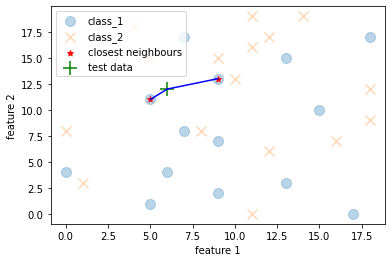

The 2 nearest neighbours are: 

Neighbour = [5, 11, 1]  	  Euclidean distance = 1.4142135623730951  	  Weight = 0.7071067811865475
Neighbour = [9, 13, 1]  	  Euclidean distance = 3.1622776601683795  	  Weight = 0.31622776601683794

The 2 nearest neighbours' classes are: 
[1, 1]
The sum of weights are: 
class_1 = 1.0233345472033855 	 class_2 = 0

Prediction class = 1
The class predicted for the data [6, 12] is 1 (Blue circle)
____________________________________________________________________________________________________
K = 3:



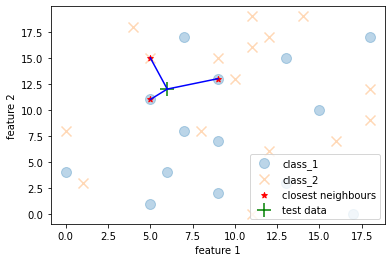

The 3 nearest neighbours are: 

Neighbour = [5, 11, 1]  	  Euclidean distance = 1.4142135623730951  	  Weight = 0.7071067811865475
Neighbour = [9, 13, 1]  	  Euclidean distance = 3.1622776601683795  	  Weight = 0.31622776601683794
Neighbour = [5, 15, 2]  	  Euclidean distance = 3.1622776601683795  	  Weight = 0.31622776601683794

The 3 nearest neighbours' classes are: 
[1, 1, 2]
The sum of weights are: 
class_1 = 1.0233345472033855 	 class_2 = 0.31622776601683794

Prediction class = 1
The class predicted for the data [6, 12] is 1 (Blue circle)
____________________________________________________________________________________________________
K = 5:



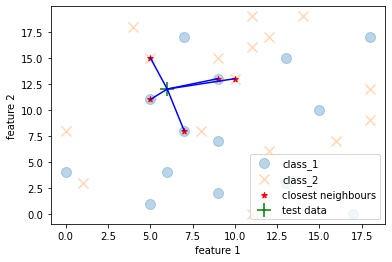

The 5 nearest neighbours are: 

Neighbour = [5, 11, 1]  	  Euclidean distance = 1.4142135623730951  	  Weight = 0.7071067811865475
Neighbour = [9, 13, 1]  	  Euclidean distance = 3.1622776601683795  	  Weight = 0.31622776601683794
Neighbour = [5, 15, 2]  	  Euclidean distance = 3.1622776601683795  	  Weight = 0.31622776601683794
Neighbour = [10, 13, 2]  	  Euclidean distance = 4.123105625617661  	  Weight = 0.24253562503633297
Neighbour = [7, 8, 1]  	  Euclidean distance = 4.123105625617661  	  Weight = 0.24253562503633297

The 5 nearest neighbours' classes are: 
[1, 1, 2, 2, 1]
The sum of weights are: 
class_1 = 1.2658701722397185 	 class_2 = 0.5587633910531709

Prediction class = 1
The class predicted for the data [6, 12] is 1 (Blue circle)
____________________________________________________________________________________________________
K = 7:



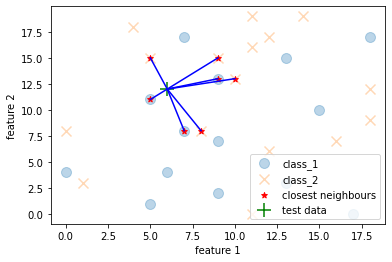

The 7 nearest neighbours are: 

Neighbour = [5, 11, 1]  	  Euclidean distance = 1.4142135623730951  	  Weight = 0.7071067811865475
Neighbour = [9, 13, 1]  	  Euclidean distance = 3.1622776601683795  	  Weight = 0.31622776601683794
Neighbour = [5, 15, 2]  	  Euclidean distance = 3.1622776601683795  	  Weight = 0.31622776601683794
Neighbour = [10, 13, 2]  	  Euclidean distance = 4.123105625617661  	  Weight = 0.24253562503633297
Neighbour = [7, 8, 1]  	  Euclidean distance = 4.123105625617661  	  Weight = 0.24253562503633297
Neighbour = [9, 15, 2]  	  Euclidean distance = 4.242640687119285  	  Weight = 0.23570226039551587
Neighbour = [8, 8, 2]  	  Euclidean distance = 4.47213595499958  	  Weight = 0.22360679774997896

The 7 nearest neighbours' classes are: 
[1, 1, 2, 2, 1, 2, 2]
The sum of weights are: 
class_1 = 1.2658701722397185 	 class_2 = 1.0180724491986657

Prediction class = 1
The class predicted for the data [6, 12] is 1 (Blue circle)
_____________________________________________

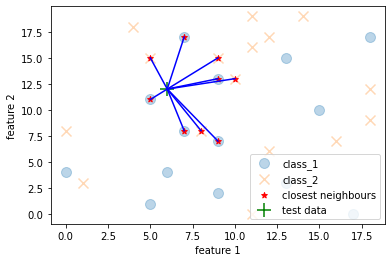

The 9 nearest neighbours are: 

Neighbour = [5, 11, 1]  	  Euclidean distance = 1.4142135623730951  	  Weight = 0.7071067811865475
Neighbour = [9, 13, 1]  	  Euclidean distance = 3.1622776601683795  	  Weight = 0.31622776601683794
Neighbour = [5, 15, 2]  	  Euclidean distance = 3.1622776601683795  	  Weight = 0.31622776601683794
Neighbour = [10, 13, 2]  	  Euclidean distance = 4.123105625617661  	  Weight = 0.24253562503633297
Neighbour = [7, 8, 1]  	  Euclidean distance = 4.123105625617661  	  Weight = 0.24253562503633297
Neighbour = [9, 15, 2]  	  Euclidean distance = 4.242640687119285  	  Weight = 0.23570226039551587
Neighbour = [8, 8, 2]  	  Euclidean distance = 4.47213595499958  	  Weight = 0.22360679774997896
Neighbour = [7, 17, 1]  	  Euclidean distance = 5.0990195135927845  	  Weight = 0.19611613513818404
Neighbour = [9, 7, 1]  	  Euclidean distance = 5.830951894845301  	  Weight = 0.17149858514250882

The 9 nearest neighbours' classes are: 
[1, 1, 2, 2, 1, 2, 2, 1, 1]
The sum 

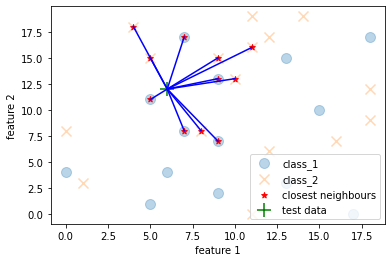

The 11 nearest neighbours are: 

Neighbour = [5, 11, 1]  	  Euclidean distance = 1.4142135623730951  	  Weight = 0.7071067811865475
Neighbour = [9, 13, 1]  	  Euclidean distance = 3.1622776601683795  	  Weight = 0.31622776601683794
Neighbour = [5, 15, 2]  	  Euclidean distance = 3.1622776601683795  	  Weight = 0.31622776601683794
Neighbour = [10, 13, 2]  	  Euclidean distance = 4.123105625617661  	  Weight = 0.24253562503633297
Neighbour = [7, 8, 1]  	  Euclidean distance = 4.123105625617661  	  Weight = 0.24253562503633297
Neighbour = [9, 15, 2]  	  Euclidean distance = 4.242640687119285  	  Weight = 0.23570226039551587
Neighbour = [8, 8, 2]  	  Euclidean distance = 4.47213595499958  	  Weight = 0.22360679774997896
Neighbour = [7, 17, 1]  	  Euclidean distance = 5.0990195135927845  	  Weight = 0.19611613513818404
Neighbour = [9, 7, 1]  	  Euclidean distance = 5.830951894845301  	  Weight = 0.17149858514250882
Neighbour = [4, 18, 2]  	  Euclidean distance = 6.324555320336759  	  Weight

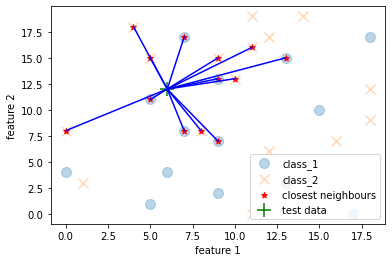

The 13 nearest neighbours are: 

Neighbour = [5, 11, 1]  	  Euclidean distance = 1.4142135623730951  	  Weight = 0.7071067811865475
Neighbour = [9, 13, 1]  	  Euclidean distance = 3.1622776601683795  	  Weight = 0.31622776601683794
Neighbour = [5, 15, 2]  	  Euclidean distance = 3.1622776601683795  	  Weight = 0.31622776601683794
Neighbour = [10, 13, 2]  	  Euclidean distance = 4.123105625617661  	  Weight = 0.24253562503633297
Neighbour = [7, 8, 1]  	  Euclidean distance = 4.123105625617661  	  Weight = 0.24253562503633297
Neighbour = [9, 15, 2]  	  Euclidean distance = 4.242640687119285  	  Weight = 0.23570226039551587
Neighbour = [8, 8, 2]  	  Euclidean distance = 4.47213595499958  	  Weight = 0.22360679774997896
Neighbour = [7, 17, 1]  	  Euclidean distance = 5.0990195135927845  	  Weight = 0.19611613513818404
Neighbour = [9, 7, 1]  	  Euclidean distance = 5.830951894845301  	  Weight = 0.17149858514250882
Neighbour = [4, 18, 2]  	  Euclidean distance = 6.324555320336759  	  Weight

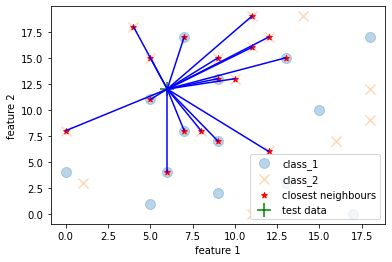

The 17 nearest neighbours are: 

Neighbour = [5, 11, 1]  	  Euclidean distance = 1.4142135623730951  	  Weight = 0.7071067811865475
Neighbour = [9, 13, 1]  	  Euclidean distance = 3.1622776601683795  	  Weight = 0.31622776601683794
Neighbour = [5, 15, 2]  	  Euclidean distance = 3.1622776601683795  	  Weight = 0.31622776601683794
Neighbour = [10, 13, 2]  	  Euclidean distance = 4.123105625617661  	  Weight = 0.24253562503633297
Neighbour = [7, 8, 1]  	  Euclidean distance = 4.123105625617661  	  Weight = 0.24253562503633297
Neighbour = [9, 15, 2]  	  Euclidean distance = 4.242640687119285  	  Weight = 0.23570226039551587
Neighbour = [8, 8, 2]  	  Euclidean distance = 4.47213595499958  	  Weight = 0.22360679774997896
Neighbour = [7, 17, 1]  	  Euclidean distance = 5.0990195135927845  	  Weight = 0.19611613513818404
Neighbour = [9, 7, 1]  	  Euclidean distance = 5.830951894845301  	  Weight = 0.17149858514250882
Neighbour = [4, 18, 2]  	  Euclidean distance = 6.324555320336759  	  Weight

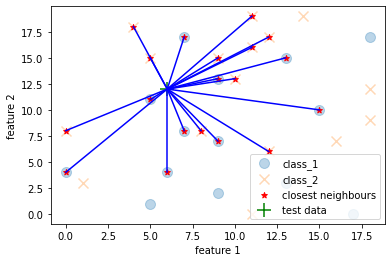

The 19 nearest neighbours are: 

Neighbour = [5, 11, 1]  	  Euclidean distance = 1.4142135623730951  	  Weight = 0.7071067811865475
Neighbour = [9, 13, 1]  	  Euclidean distance = 3.1622776601683795  	  Weight = 0.31622776601683794
Neighbour = [5, 15, 2]  	  Euclidean distance = 3.1622776601683795  	  Weight = 0.31622776601683794
Neighbour = [10, 13, 2]  	  Euclidean distance = 4.123105625617661  	  Weight = 0.24253562503633297
Neighbour = [7, 8, 1]  	  Euclidean distance = 4.123105625617661  	  Weight = 0.24253562503633297
Neighbour = [9, 15, 2]  	  Euclidean distance = 4.242640687119285  	  Weight = 0.23570226039551587
Neighbour = [8, 8, 2]  	  Euclidean distance = 4.47213595499958  	  Weight = 0.22360679774997896
Neighbour = [7, 17, 1]  	  Euclidean distance = 5.0990195135927845  	  Weight = 0.19611613513818404
Neighbour = [9, 7, 1]  	  Euclidean distance = 5.830951894845301  	  Weight = 0.17149858514250882
Neighbour = [4, 18, 2]  	  Euclidean distance = 6.324555320336759  	  Weight

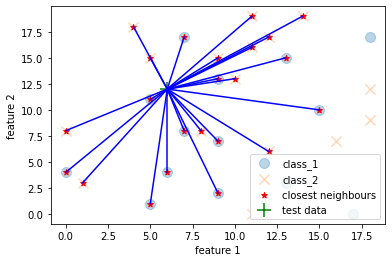

The 23 nearest neighbours are: 

Neighbour = [5, 11, 1]  	  Euclidean distance = 1.4142135623730951  	  Weight = 0.7071067811865475
Neighbour = [9, 13, 1]  	  Euclidean distance = 3.1622776601683795  	  Weight = 0.31622776601683794
Neighbour = [5, 15, 2]  	  Euclidean distance = 3.1622776601683795  	  Weight = 0.31622776601683794
Neighbour = [10, 13, 2]  	  Euclidean distance = 4.123105625617661  	  Weight = 0.24253562503633297
Neighbour = [7, 8, 1]  	  Euclidean distance = 4.123105625617661  	  Weight = 0.24253562503633297
Neighbour = [9, 15, 2]  	  Euclidean distance = 4.242640687119285  	  Weight = 0.23570226039551587
Neighbour = [8, 8, 2]  	  Euclidean distance = 4.47213595499958  	  Weight = 0.22360679774997896
Neighbour = [7, 17, 1]  	  Euclidean distance = 5.0990195135927845  	  Weight = 0.19611613513818404
Neighbour = [9, 7, 1]  	  Euclidean distance = 5.830951894845301  	  Weight = 0.17149858514250882
Neighbour = [4, 18, 2]  	  Euclidean distance = 6.324555320336759  	  Weight

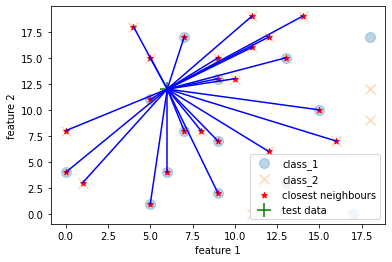

The 24 nearest neighbours are: 

Neighbour = [5, 11, 1]  	  Euclidean distance = 1.4142135623730951  	  Weight = 0.7071067811865475
Neighbour = [9, 13, 1]  	  Euclidean distance = 3.1622776601683795  	  Weight = 0.31622776601683794
Neighbour = [5, 15, 2]  	  Euclidean distance = 3.1622776601683795  	  Weight = 0.31622776601683794
Neighbour = [10, 13, 2]  	  Euclidean distance = 4.123105625617661  	  Weight = 0.24253562503633297
Neighbour = [7, 8, 1]  	  Euclidean distance = 4.123105625617661  	  Weight = 0.24253562503633297
Neighbour = [9, 15, 2]  	  Euclidean distance = 4.242640687119285  	  Weight = 0.23570226039551587
Neighbour = [8, 8, 2]  	  Euclidean distance = 4.47213595499958  	  Weight = 0.22360679774997896
Neighbour = [7, 17, 1]  	  Euclidean distance = 5.0990195135927845  	  Weight = 0.19611613513818404
Neighbour = [9, 7, 1]  	  Euclidean distance = 5.830951894845301  	  Weight = 0.17149858514250882
Neighbour = [4, 18, 2]  	  Euclidean distance = 6.324555320336759  	  Weight

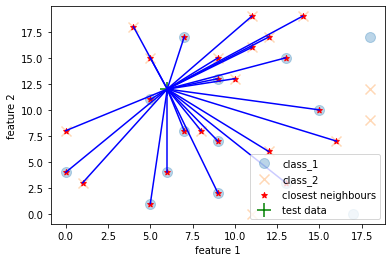

The 25 nearest neighbours are: 

Neighbour = [5, 11, 1]  	  Euclidean distance = 1.4142135623730951  	  Weight = 0.7071067811865475
Neighbour = [9, 13, 1]  	  Euclidean distance = 3.1622776601683795  	  Weight = 0.31622776601683794
Neighbour = [5, 15, 2]  	  Euclidean distance = 3.1622776601683795  	  Weight = 0.31622776601683794
Neighbour = [10, 13, 2]  	  Euclidean distance = 4.123105625617661  	  Weight = 0.24253562503633297
Neighbour = [7, 8, 1]  	  Euclidean distance = 4.123105625617661  	  Weight = 0.24253562503633297
Neighbour = [9, 15, 2]  	  Euclidean distance = 4.242640687119285  	  Weight = 0.23570226039551587
Neighbour = [8, 8, 2]  	  Euclidean distance = 4.47213595499958  	  Weight = 0.22360679774997896
Neighbour = [7, 17, 1]  	  Euclidean distance = 5.0990195135927845  	  Weight = 0.19611613513818404
Neighbour = [9, 7, 1]  	  Euclidean distance = 5.830951894845301  	  Weight = 0.17149858514250882
Neighbour = [4, 18, 2]  	  Euclidean distance = 6.324555320336759  	  Weight

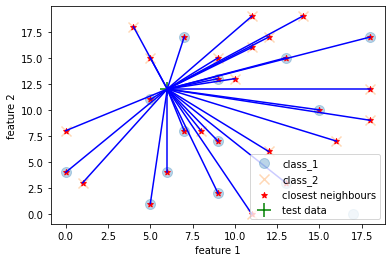

The 29 nearest neighbours are: 

Neighbour = [5, 11, 1]  	  Euclidean distance = 1.4142135623730951  	  Weight = 0.7071067811865475
Neighbour = [9, 13, 1]  	  Euclidean distance = 3.1622776601683795  	  Weight = 0.31622776601683794
Neighbour = [5, 15, 2]  	  Euclidean distance = 3.1622776601683795  	  Weight = 0.31622776601683794
Neighbour = [10, 13, 2]  	  Euclidean distance = 4.123105625617661  	  Weight = 0.24253562503633297
Neighbour = [7, 8, 1]  	  Euclidean distance = 4.123105625617661  	  Weight = 0.24253562503633297
Neighbour = [9, 15, 2]  	  Euclidean distance = 4.242640687119285  	  Weight = 0.23570226039551587
Neighbour = [8, 8, 2]  	  Euclidean distance = 4.47213595499958  	  Weight = 0.22360679774997896
Neighbour = [7, 17, 1]  	  Euclidean distance = 5.0990195135927845  	  Weight = 0.19611613513818404
Neighbour = [9, 7, 1]  	  Euclidean distance = 5.830951894845301  	  Weight = 0.17149858514250882
Neighbour = [4, 18, 2]  	  Euclidean distance = 6.324555320336759  	  Weight

In [14]:
for k in k_values:
    print(f"K = {k}:\n")
    prediction = Weighted_KNN_prediction(test_data, dataset, k)
    print(f"The class predicted for the data {test_data} is {prediction}", end="")
    if prediction == 1:
        print(" (Blue circle)")
    else:
        print(" (Orange cross)")
    print("_"*100)

The sum of weight of class_1 is greater than the sum of weight of class_2 for all the values of K as shown above. Hence, the predicted class is <strong>class = 1 (Blue circle)</strong>

<hr>

### Conclusion

In the regular KNN model, the class predicted for different values of K were different. For smaller values of K (K <= 9) with the exception of K = 7, the predictions were <strong>class = 1 (blue circle)</strong>, while for K > 9, the predicted classes were <strong>class = 2 (Orange cross)</strong><br>
<br>
However, in case of Weighted KNN, the prediction is <strong>class = 1 (Blue circle)</strong> for all values of K<br><br>
From the images above, we can observe that the <i>test_data (6,12)</i> is closer to data points corresponding to class_1 (Blue circle) than it is to class_2 (Orange cross) for all values of K. It can sometimes be difficult to accurately classify the <i>test_data</i> simply based on the distance measure. Thus, we assign weights to the neighbours - closer the data point is to the <i>test_data</i>, higher the weight it holds. <br><br>
Weighted KNN gives more consistent prediction as <strong>class = 1 (Blue circle)</strong>.

<hr>